In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import modules.cpa_comparison as cpa

# Mockデータ作成

In [3]:
X, y = cpa.mock_data(length=1000)

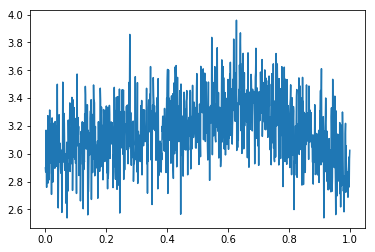

In [4]:
plt.plot(X, y)

# 変化点解析実行例
- cp_index : 変化点のインデックス
- result : ((左断片傾き, 右断片傾き), (左断片y切片, 右断片y切片), (左断片誤差, 右断片誤差))

In [5]:
cp_index, result = cpa.detect_a_cp(X,y)

In [6]:
result

((0.505770339018668, -1.3646676223785268),
 (2.994241638828979, 4.286647370064069),
 (24.830012062825958, 16.68942309959771))

In [7]:
X[cp_index]

0.615

# 普通にPythonで書く

In [8]:
%timeit cp_index, result = cpa.detect_a_cp(X,y)

80.1 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# joblibによる並列処理

In [9]:
%timeit cp_index, result = cpa.detect_a_cp_joblib(X,y)

66.6 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Cython（型指定）

In [10]:
from modules import cython_func

In [11]:
%timeit cp_x, result = cython_func.detect_a_cp(X, y)

77.6 ms ± 2.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
